# K Nearest Neighbors

Rock Boynton CS 4850


## Introduction

In this notebook, we will implement and apply the K-Nearest Neighbors (KNN) classification and regression machine learning algorithm to some data, specifically the Iris dataset from scikit-learn. 

We will:

    a. see how accurate our model was compared to known values

    b. perform some analyses on the data itself from the results of the model, such as determining which features (or combinations of features) are able to best divide the classes
    
    c. analyze the KNN algorithm, including its drawbacks and advantages

This will provide a good introduction to some machine learning techniques.

## Summary of results

The Iris dataset seems to have the petal_length vs petal_width features as the best able to divide the classes because they show the tightest intraclass grouping with minimal overlap. 

After implementing the KNN algorithm, applying it, and testing values of k between 1 and 10, it seems k = 7 and k = 9 are good to use for this dataset.

KNN is relatively simple to understand and implement (yet nonetheless challenging for a first-timer with no previous linear algebra knowlege) but it is "lazy" and potentially computationally expensive, so it is not as commonly used as other algorithms.

Overall, this was a good challenge to wrap my brain around manipulating data and applying methods to create models. I think this assignment gave me a good foundation to build upon in my machine learning adventures.

## Feature plots

First, we must load in our KNN class, and iris dataset from `sklearn.datasets`

In [11]:
from knn import KNN
from sklearn.datasets import load_iris
iris_dataset = load_iris()

['DESCR', 'data', 'feature_names', 'target', 'target_names']

Now, we can make scatter plots of each feature vs every other feature, coloring the points by their targets(labels)

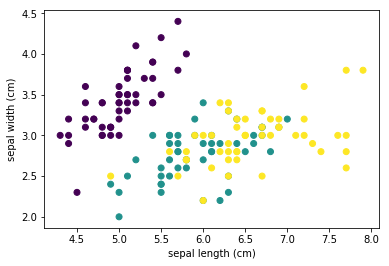

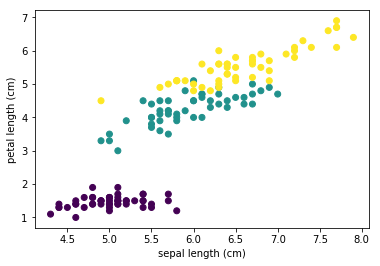

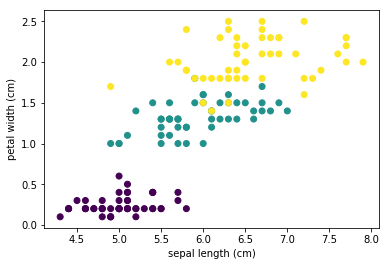

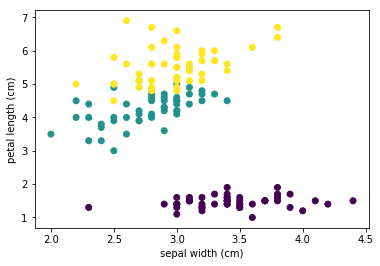

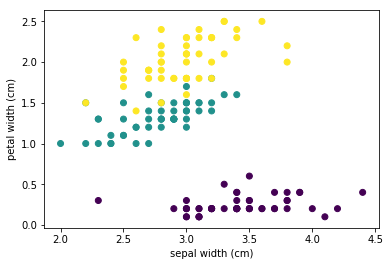

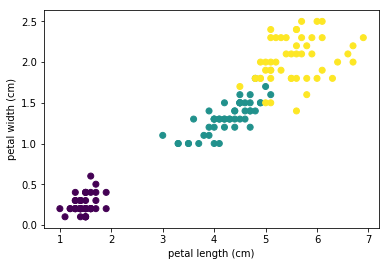

In [51]:
import matplotlib.pyplot as plt
from itertools import combinations

labels = combinations(iris_dataset.feature_names, 2)
indices = combinations(range(len(iris_dataset.feature_names)), 2)
for (x_label, y_label), (x1, x2) in zip(labels, indices):
    plt.scatter(iris_dataset.data[:,x1], iris_dataset.data[:,x2], c=iris_dataset.target)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Classification

To use the KNN algorithm we developed, we first need to:

    1. divide the data into training and testing sets

    2. Use the `KNN` class we created to classify the flowers by species, comparing the accuracy (k = 1..10) of the predicted labels to the known labels for the testing set.

We will run that 1000 times and take the average accuracy score for each k, to determine the best value of k for this dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

accuracy = np.empty(shape=(1000, 10))
for i in range(accuracy.shape[0]):
    train_X, test_X, train_y, test_y = train_test_split(iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target)
    for j in range(accuracy.shape[1]):
        knn = KNN(j+1, "mode")
        knn.fit(train_X, train_y)
        pred_y = knn.predict(test_X)
        accuracy[i, j] = accuracy_score(test_y, pred_y)

plt.scatter(range(1, 11), np.mean(accuracy, axis=0))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

## Questions

a. Based on the scatter plots of the features, which features (or combinations of features)
are able to best separate the classes?

        * From what I can tell, it seems like the only combination of features that **doesn't** do a decent job at seperating the classes is the sepal_length vs sepal_width. If I had to choose the best combination of features it would be the petal_length vs petal_width because that shows the tightest intraclass grouping with minimal overlap.

b. Which value of k gives the best (highest) accuracy?

        * The accuracy is different per k value for each time the dataset is split with `train_test_split`, so it's hard to say which   value of k is the best. However, k should not be even, nor an odd multiple of 3 (the number of labels) in order to avoid ties i.e. where the mode would be undefined. The value of k should also not be too small, because that makes it more susceptible to noise, nor too large making it computationally expensive. From that knowlege, I believe k = 7 has the highest accuracy. However, when taking the average of 1000 train_test_split and accuracy scores, k = 9 seems to be marginally better.

c. What do you think the potential downsides of the k-nearest neighbors algorithm are?
Why do you think it might not be used as widely as other methods?

        * After doing some research, I discovered that the KNN algorithm is considered "lazy" meaning that it doesn't learn from the training dataset, rather simply uses it for classification of the test data. 
        * There are some issues relating to the need to calculate the distance between the new and existing points, including the cost of the calculation itself, degrading performance, as well as the difficulty of calculating distance in higher dimensions.
        * One other issue I noticed is that if there is an equal frequency of all or several of the reference labels, the mode is undefined, and for the `scipy.stats.mode()` method, it defaults to the smallest. 
        * For these reasons, it might not be as widley used, passed over for less computationally expensive and/or "eager" learning algorithms.